<a href="https://colab.research.google.com/github/erictong0/FrederickLab2023/blob/main/Histogram%20Creation/230705_Proline_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

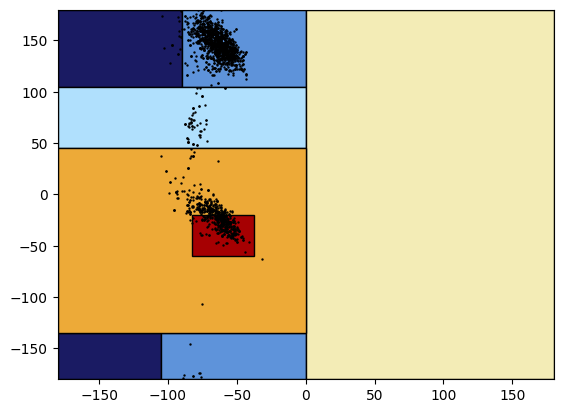

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


angles = {
  'rbetaA':(-180.0, -90.0, 105.0, 180.0),
  'rbetaB':(-180.0,-105.0,-180.0,-135.0),
  'rppiiA':( -90.0,   0.0, 105.0, 180.0),
  'rppiiB':(-105.0,   0.0,-180.0,-135.0),
  'rdelta':(-180.0,   0.0,  45.0, 105.0),
  'rlhelx':(   0.0, 180.0,-180.0, 180.0),
  'rturnI':(-180.0,   0.0,-135.0,  45.0), # turn is wider alpha
  'ralpha':( -82.5, -37.5, -60.0, -20.0), # alph is strictly alpha
  }

def makeRect(s, c):
  return Rectangle((s[0], s[2]), s[1]-s[0], s[3]-s[2], color = c, lw = 1, ec = "#000000")




df = pd.read_csv('P_2k.out', sep="\t", header=0)
x = df['phi']
y = df['psi']




fig, ax = plt.subplots(1)

ax.add_patch(makeRect(angles['rbetaA'], "#1a1b63"))
ax.add_patch(makeRect(angles['rbetaB'], "#1a1b63"))

ax.add_patch(makeRect(angles['rppiiA'], "#5e93da"))
ax.add_patch(makeRect(angles['rppiiB'], "#5e93da"))

ax.add_patch(makeRect(angles['rdelta'], "#b0e0fd"))

ax.add_patch(makeRect(angles['rlhelx'], "#f3eCb6"))

ax.add_patch(makeRect(angles['rturnI'], "#edaa38"))
ax.add_patch(makeRect(angles['ralpha'], "#a60002"))




ax.scatter(x, y, s = .5, c = '#000000')
ax.set(xlim=(-180, 180), ylim=(-180, 180))
plt.rcParams["figure.figsize"] = (5,5)

plt.show()



NameError: ignored

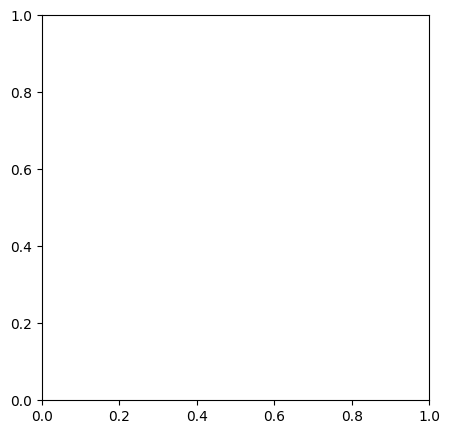

In [ ]:
fig, ax = plt.subplots()

atoms = ['ca','cb','c']
aa_range = [[57,74],[25,42],[170,184]]
#angles defined
colors = ['#1b1b64', '#5e93dc', '#b3dfff', '#f3ecb7', '#eeaa38', '#a60000']

tempname = 'rbetaA'
betaA = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'rbetaB'
betaB = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
beta = pd.concat([betaA, betaB])

tempname = 'rppiiA'
ppiiA = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'rppiiB'
ppiiB = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
ppii = pd.concat([ppiiA, ppiiB])

tempname = 'rdelta'
ddgg = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'ralpha'
alph = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'rlhelx'
left = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]

bins = aa_range[0][0]


shifts = [ca, cb, c]

plt.rcParams["figure.figsize"] = (3,3)

fig, axs = plt.sublots(1, 3, sharey = False, figsize = (9.75, 1.5))
bins_array = [np.arange(number[0], number[1]+1, .25) for number in aa_range]

for i in range(3):
  h, bins, patches = axs[i].hist(list(cs_all[atoms[i]].values()),
                      bins=bins_array[i],
                      density=False,
                      histtype='stepfilled',
                      stacked=True,
                      color=colors,)

plt.show()
#plt.rcParams["figure.figsize"] = (3,3)
#ax.hist(cb, bins = range)
#plt.show()


TypeError: ignored

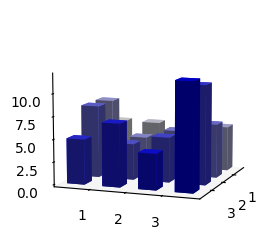

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
colors = ["#FFFFFF", "#EEEEFF", "#DDDDFF", "#CCCCFF", "#BBBBFF", "#AAAAFF", "#9999FF", "#8888FF", "#7777FF", "#6666FF", "#5555FF", "#4444FF", "#3333FF", "#2222FF", "#1111FF", "#0000FF"]
collect = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color = colors)
ax.view_init(elev = 10, azim = 20)
ax.xaxis.set_pane_color((1, 1, 1, 0))
ax.yaxis.set_pane_color((1, 1, 1, 0))
ax.xaxis._axinfo['axisline']['linewidth'] = 0
ax.grid(False)
ax.zaxis("off")
plt.show()

0
1
2


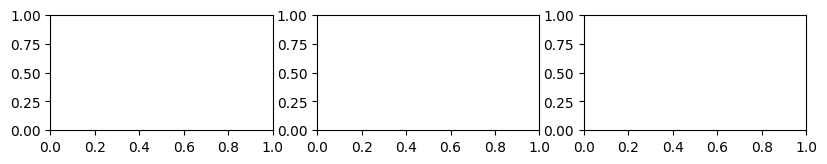

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#defining set things for proline
atoms = ['ca', 'cb', 'c']
aa_range = [[57,74],[25,42],[170,184]]
angle_definitions = {
  'rbetaA':(-180.0, -90.0, 105.0, 180.0),
  'rbetaB':(-180.0,-105.0,-180.0,-135.0),
  'rppiiA':( -90.0,   0.0, 105.0, 180.0),
  'rppiiB':(-105.0,   0.0,-180.0,-135.0),
  'rdelta':(-180.0,   0.0,  45.0, 105.0),
  'rlhelx':(   0.0, 180.0,-180.0, 180.0),
  'rturnI':(-180.0,   0.0,-135.0,  45.0), # turn is wider alpha
  'ralpha':( -82.5, -37.5, -60.0, -20.0), # alph is strictly alpha
}

#colors
colors = ['#1b1b64', '#5e93dc', '#b3dfff', '#f3ecb7', '#eeaa38', '#a60000']

#reading the data
df = pd.read_csv('P_2k.out', sep = '\t', header = 0)
labels = ['beta','ppii','ddgg','left','turn','alph']

#making different variables based on each section

#delta, alpha, and left helix are easy: just get definitions
tempname = 'rdelta'
ddgg = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'ralpha'
alph = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'rlhelx'
left = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]

#beta/ppii have both a top and bottom segment, so need to account for both top (A) and bottom (B) sections
tempname = 'rbeta'
beta = pd.concat([df.loc[(df['phi'] >= angles[tempname + "A"][0]) & (df['phi'] < angles[tempname + "A"][1]) & (df['psi'] >= angles[tempname + "A"][2]) & (df['psi'] < angles[tempname + "A"][3])], df.loc[(df['phi'] >= angles[tempname + "B"][0]) & (df['phi'] < angles[tempname + "B"][1]) & (df['psi'] >= angles[tempname + "B"][2]) & (df['psi'] < angles[tempname + "B"][3])]])
tempname = 'rppii'
ppii = pd.concat([df.loc[(df['phi'] >= angles[tempname + "A"][0]) & (df['phi'] < angles[tempname + "A"][1]) & (df['psi'] >= angles[tempname + "A"][2]) & (df['psi'] < angles[tempname + "A"][3])], df.loc[(df['phi'] >= angles[tempname + "B"][0]) & (df['phi'] < angles[tempname + "B"][1]) & (df['psi'] >= angles[tempname + "B"][2]) & (df['psi'] < angles[tempname + "B"][3])]])

#special case because turn needs to be everything except for the "alpha" section, used XOR but it might not work
tempname = 'rturnI'
tempname2 = 'ralpha'
turn = df.loc[((df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])) ^ ((df['phi'] >= angles[tempname2][0]) & (df['phi'] < angles[tempname2][1]) & (df['psi'] >= angles[tempname2][2]) & (df['psi'] < angles[tempname2][3]))]

#nice list to make future things easier
allsections = [beta, ppii, ddgg, left, turn, alph]
#makes the alpha/beta/overall carbon shifts into dictionaries based on the categories
ca = {}
cb = {}
co = {}
for i in [0, 1, 2, 3, 4, 5]:
  ca[labels[i]] = allsections[i]['ca'].values.tolist()
  cb[labels[i]] = allsections[i]['cb'].values.tolist()
  co[labels[i]] = allsections[i]['c'].values.tolist()

#making pyplot figure
fig, axs = plt.subplots(1, 3, sharey = False, figsize = (9.75, 1.5))

#makes an array for the future histogram categories
bins_array = [np.arange(i[0], i[1] + 1, .25) for i in aa_range]

#making total array
all = {'ca': ca, 'cb' : cb, 'c' : co}

for i in range(3):
  print(i)